# Homework 8: CME
Ross Freeman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
# Initialize constants and initial values

V = np.asarray([[-1, 1, 0], [-1, 1, 1], [1, -1, -1], [0, 0, 1]])

nA = 6.023e23
vol = 1e-15
c = [1e6 / (nA * vol), 1e-4, 0.1]

In [3]:
def find_values(X): 
    # Create arrays containing states at all times, t
    substrate = [[X[0], 0]]
    product = [[X[3], 0]]
    
    a = [0, 0, 0]
    t = 0
    tfinal = 50
    while t < tfinal:
        a[0] = c[0] * X[0] * X[1]
        a[1] = c[1] * X[2]
        a[2] = c[2] * X[2]
        asum = np.sum(a)
        cumsum = np.cumsum(a/asum)
        ind = 0
        
        # Enumerate through cumsum and find first index such that rand < val
        rand = random.uniform(0, 1)
        for idx, val in enumerate(cumsum):
            if rand < val:
                ind = idx
                break
        rand = random.uniform(0, 1)
        tau = np.log(1 / rand)/asum
        X = np.add(X, V.T[ind % 3])

        substrate.append([X[0], t])
        product.append([X[3], t])

        t = t + tau
    return product, substrate

def plot_chart(X, title):
    product, substrate = find_values(X)
    # Convert to np array so we can find transpose for easy graphing
    substrate = np.asarray(substrate)
    product = np.asarray(product)

    plt.figure()
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Number of Molecules')
    plt.plot(substrate.T[1], substrate.T[0], '*', label = "Substrate")
    plt.plot(product.T[1], product.T[0], '*', label = "Product")
    plt.legend()
    plt.show()

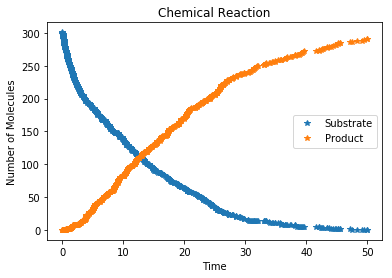

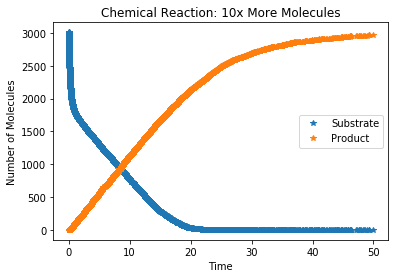

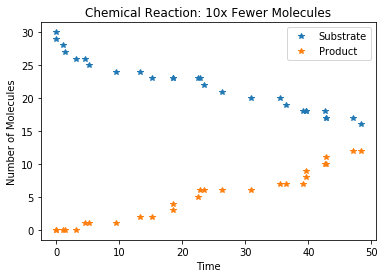

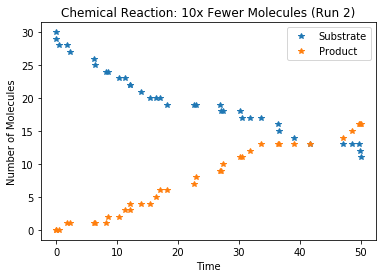

In [4]:
X = np.asarray([0, 0, 0, 0])
X[0] = 5e-7 * nA * vol
X[1] = 2e-7 * nA * vol
plot_chart(X, 'Chemical Reaction')

X = np.asarray([0, 0, 0, 0])
X[0] = 5e-6 * nA * vol
X[1] = 2e-6 * nA * vol
plot_chart(X, 'Chemical Reaction: 10x More Molecules')

X = np.asarray([0, 0, 0, 0])
X[0] = 5e-8 * nA * vol
X[1] = 2e-8 * nA * vol
plot_chart(X, 'Chemical Reaction: 10x Fewer Molecules')

# Second run to show variability
X = np.asarray([0, 0, 0, 0])
X[0] = 5e-8 * nA * vol
X[1] = 2e-8 * nA * vol
plot_chart(X, 'Chemical Reaction: 10x Fewer Molecules (Run 2)')

## Observations
Based on the graphs above, there are a number of notable differences that depend on the initial values. When the number of molecules increased by 10x, the rate of the reaction is much greater. Due to this, the number of total reactions in the time period is greater, resulting in a smoother curve. The point in which the number of product is greater than the number of substrate happens earlier and the end difference is larger.

When decreasing the initial values by 10x, the opposite occurs. The rate of reaction of much smaller and there are fewer overall reactions. Since there are fewer reactions, there is greater variability in the graph between runs: some runs produce more product that substrate in the end while others have the opposite. The other 2 graphs, while still having variable data, do not produce such drastic differences.

What is particularly interesting between the 3 graphs is the behavior of the reaction rate over time. Regardless of how many molecules there are, the rate decays over time, eventually levelling off at what appears to be the equilibrium. 

Ralf: Very nice work, and very nice discussion of observations! It would be nice to also show the behaviour of E and SE. Also, what is decaying over time is not the reaction rate, but the changes in the state vector (there are still lots of reactions happening, but those reactions balance each other out).